In [1]:
#import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import requests
import os
import json
import csv

# Gathering Data

#### Data on hand
this is the original data on hand

In [2]:
twitter_archive = pd.read_csv(r'C:\Users\user\Pictures\Udacity_nanodegree\twitter-archive-enhanced.csv')
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [3]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [4]:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


#### requested data

##### request and create a folder for the image prediction files
i requested for the content of the url and saved the content into a folder named img_pred

In [5]:
#create a folder
folder_name = 'img_pred'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
    
#create the request
url = ' https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

In [6]:
#access the content and write to a file
with open('image_prediction/image_prediction.tsv','wb') as file:
    file.write(response.content)
    
image_pred = pd.read_csv('image_prediction/image_prediction.tsv', sep='\t')
image_pred.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [7]:
image_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [8]:
image_pred.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


#### Additional Data from Twitter API

In [9]:
tweet_json = []
with open('tweet-json.txt','r') as file:
    for line in file:
        tweets = json.loads(line)
        tweet_id = tweets['id']
        retweet_count = tweets['retweet_count']
        favorite_count = tweets['favorite_count']
        
        tweet_json.append({'tweet_id':tweet_id,'retweet_count': retweet_count,
                    'favorite_count': favorite_count})
tweet_json = pd.DataFrame(tweet_json)

tweet_json.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [10]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [11]:
tweet_json.describe()

,tweet_id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


In [12]:
all_columns = pd.Series(list(twitter_archive) + list(image_pred) + list(tweet_json))
all_columns[all_columns.duplicated()]

17    tweet_id
29    tweet_id
dtype: object

# Assessing Data

## Quality
### Twitter_archieve
1) missing data in columns

2) errorneous maximum rating (1776), probably a retweet

3) Errorneous datatype for timestamp

4) multiple 'a' and 'an' in name column which could be replaced to None

5) html tags in source column 

### image_pred
6) rows with rating_numerator < 5 are not dog images when the links are assessed

7) Alternative predictions of the dogs arent necessary

8) there are rows that predict false as dog. and they arent dogs


## Tidiness
### twitter archieve
1) doggo, floofer, pupper, puppo to form one column

2) merge the three datasets into a clean master dataset

# Cleaning the data

In [13]:
#first i copy the data for cleaning
archive_clean = twitter_archive.copy()
img_clean = image_pred.copy()
json_clean = tweet_json.copy()


### Define

1) drop columns with missing data

### Code

In [14]:
archive_clean.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'], axis = 1, inplace = True)

### Test

In [15]:
archive_clean.isnull().sum()

tweet_id               0
timestamp              0
source                 0
text                   0
expanded_urls         59
rating_numerator       0
rating_denominator     0
name                   0
doggo                  0
floofer                0
pupper                 0
puppo                  0
dtype: int64

### Define

2) drop row with rating numerator equal 1776. 

### Code

In [16]:
#Query and drop 
archive_clean.query('rating_numerator == 1776')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
979,749981277374128128,2016-07-04 15:00:45 +0000,"<a href=""https://about.twitter.com/products/tw...",This is Atticus. He's quite simply America af....,https://twitter.com/dog_rates/status/749981277...,1776,10,Atticus,None,None,None,None


In [17]:
archive_clean.drop(979, inplace=True)

### Test

In [18]:
archive_clean.query('rating_numerator == 1776')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### Define

3) convert datatype of timestamp from object to datetime

### Code

In [19]:
archive_clean['timestamp'] = pd.to_datetime(archive_clean['timestamp'])

### Test

In [20]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2355 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2355 non-null   int64              
 1   timestamp           2355 non-null   datetime64[ns, UTC]
 2   source              2355 non-null   object             
 3   text                2355 non-null   object             
 4   expanded_urls       2296 non-null   object             
 5   rating_numerator    2355 non-null   int64              
 6   rating_denominator  2355 non-null   int64              
 7   name                2355 non-null   object             
 8   doggo               2355 non-null   object             
 9   floofer             2355 non-null   object             
 10  pupper              2355 non-null   object             
 11  puppo               2355 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3

### Define

4) replace 'a', 'an' to None in name column to make the column more uniform

### Code

In [21]:
#archive_clean[archive_clean.name == 'a'].index.replace('a','None')
archive_clean.loc[archive_clean.name == 'a', 'name'] = 'None'

In [22]:
#archive_clean.name[archive_clean.name == "a"].replace('a','None')

archive_clean.loc[archive_clean.name == 'an', 'name'] = 'None'

### Test

In [23]:
archive_clean.name

0        Phineas
1          Tilly
2         Archie
3          Darla
4       Franklin
          ...   
2351        None
2352        None
2353        None
2354        None
2355        None
Name: name, Length: 2355, dtype: object

### Define

5) remove html tags from source column to expose the source of the tweet

### Code

In [24]:
archive_clean.source = archive_clean.source.str.replace(r'<[^<>]*>', '', regex=True)

### Test

In [25]:
archive_clean.source.unique()

array(['Twitter for iPhone', 'Twitter Web Client', 'Vine - Make a Scene',
       'TweetDeck'], dtype=object)

### Define

6) drop row with rating_num < 5. as they are usually not having images of dogs in them

### Code

In [26]:
archive_clean = archive_clean.drop(archive_clean[archive_clean.rating_numerator < 5].index)

### Test

In [27]:
archive_clean.query('rating_numerator < 5')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### Define

7) drop column with alternative prediction(p2,p2_coef) other than correct prediction(p1) in image_pred dataset

### Code

In [28]:
img_clean.drop(['p2','p2_conf','p2_dog','p3','p3_conf','p3_dog'], axis = 1, inplace = True)

### Test

In [29]:
img_clean

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True
...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True


### Define

8) drop row with p1_dog is false

### Code

In [30]:
#image_pred.drop([image_pred.p1_dog == False])
img_clean = img_clean.drop(img_clean[img_clean.p1_dog == False].index)

### Test

In [31]:
img_clean.query('p1_dog == False')

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog


# Tidiness

### Define
1) melt the doggo, floofer, pupper, puppo into one column

### Code

In [32]:
archive_clean = pd.melt(archive_clean, id_vars = ['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name'],var_name='dog_stage', value_vars = ['doggo', 'floofer',
       'pupper', 'puppo'])

### Test

In [33]:

archive_clean 

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,value
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,doggo,None
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,doggo,None
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,doggo,None
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,doggo,None
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,doggo,None
...,...,...,...,...,...,...,...,...,...,...
9191,666049248165822465,2015-11-16 00:24:50+00:00,Twitter for iPhone,Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5,10,None,puppo,None
9192,666044226329800704,2015-11-16 00:04:52+00:00,Twitter for iPhone,This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6,10,None,puppo,None
9193,666033412701032449,2015-11-15 23:21:54+00:00,Twitter for iPhone,Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,10,None,puppo,None
9194,666029285002620928,2015-11-15 23:05:30+00:00,Twitter for iPhone,This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,10,None,puppo,None


In [34]:
merge = pd.merge(archive_clean, img_clean, on = 'tweet_id', how = 'inner')

In [35]:
twitter_archive_master = pd.merge(merge, json_clean, on = 'tweet_id', how='inner') 

# Storing cleaned file

In [36]:
twitter_archive_master.to_csv('twitter_archive_master.csv')

# Analyzing and visualizing Data

### Questions
#### 1) what p1(dog_breed) was predicted the most?
#### 2) what stage was the most popular apart from 'None'?
#### 3) what source did people use to upload the most?

In [37]:
twitter_archive_master.describe()

,tweet_id,rating_numerator,rating_denominator,img_num,p1_conf,retweet_count,favorite_count
count,6.084000e+03,6084.000000,6084.000000,6084.000000,6084.000000,6084.000000,6084.000000
mean,7.431373e+17,11.630506,10.518080,1.213675,0.614387,3006.756739,8999.443787
std,6.860245e+16,7.742118,6.740865,0.575433,0.259474,5131.777510,12514.408223
min,6.660209e+17,5.000000,7.000000,1.000000,0.044333,16.000000,0.000000
25%,6.789918e+17,10.000000,10.000000,1.000000,0.392535,682.000000,1896.000000
50%,7.203899e+17,11.000000,10.000000,1.000000,0.614231,1513.000000,4225.000000
75%,7.989340e+17,12.000000,10.000000,1.000000,0.852088,3520.000000,11416.000000
max,8.921774e+17,165.000000,150.000000,4.000000,0.999956,79515.000000,132810.000000


# checking outliers

In [38]:
Q1 = twitter_archive_master.rating_numerator.quantile(0.25)
Q3 = twitter_archive_master.rating_numerator.quantile(0.75)

IQR_num = Q3 - Q1
IQR_mult_num = IQR_num*1.5

lower_num = Q1 - IQR_mult_num
upper_num = Q3 + IQR_mult_num

In [39]:
lower_num, upper_num

(7.0, 15.0)

In [40]:
twitter_archive_master.drop(twitter_archive_master[twitter_archive_master.rating_numerator > 15].index, inplace=True)

In [41]:
twitter_archive_master

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,value,jpg_url,img_num,p1,p1_conf,p1_dog,retweet_count,favorite_count
0,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,doggo,None,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,6514,33819
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,floofer,None,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,6514,33819
2,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,pupper,None,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,6514,33819
3,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,puppo,None,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,6514,33819
4,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,doggo,None,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,4328,25461
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6079,666029285002620928,2015-11-15 23:05:30+00:00,Twitter for iPhone,This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,10,None,puppo,None,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,48,132
6080,666020888022790149,2015-11-15 22:32:08+00:00,Twitter for iPhone,Here we have a Japanese Irish Setter. Lost eye...,https://twitter.com/dog_rates/status/666020888...,8,10,None,doggo,None,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,532,2535
6081,666020888022790149,2015-11-15 22:32:08+00:00,Twitter for iPhone,Here we have a Japanese Irish Setter. Lost eye...,https://twitter.com/dog_rates/status/666020888...,8,10,None,floofer,None,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,532,2535
6082,666020888022790149,2015-11-15 22:32:08+00:00,Twitter for iPhone,Here we have a Japanese Irish Setter. Lost eye...,https://twitter.com/dog_rates/status/666020888...,8,10,None,pupper,None,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,532,2535


In [42]:
twitter_archive_master.describe()

,tweet_id,rating_numerator,rating_denominator,img_num,p1_conf,retweet_count,favorite_count
count,6.024000e+03,6024.000000,6024.000000,6024.000000,6024.000000,6024.000000,6024.000000
mean,7.432805e+17,10.995352,10.000664,1.214475,0.614019,3019.652058,9035.610226
std,6.876593e+16,1.597559,0.025762,0.577240,0.259516,5152.894400,12561.672248
min,6.660209e+17,5.000000,10.000000,1.000000,0.044333,16.000000,0.000000
25%,6.787983e+17,10.000000,10.000000,1.000000,0.391471,682.000000,1889.000000
50%,7.207804e+17,11.000000,10.000000,1.000000,0.614025,1516.500000,4228.500000
75%,7.992971e+17,12.000000,10.000000,1.000000,0.849029,3536.000000,11503.000000
max,8.921774e+17,14.000000,11.000000,4.000000,0.999956,79515.000000,132810.000000


## 1) what p1(dog_breed) was predicted the most?

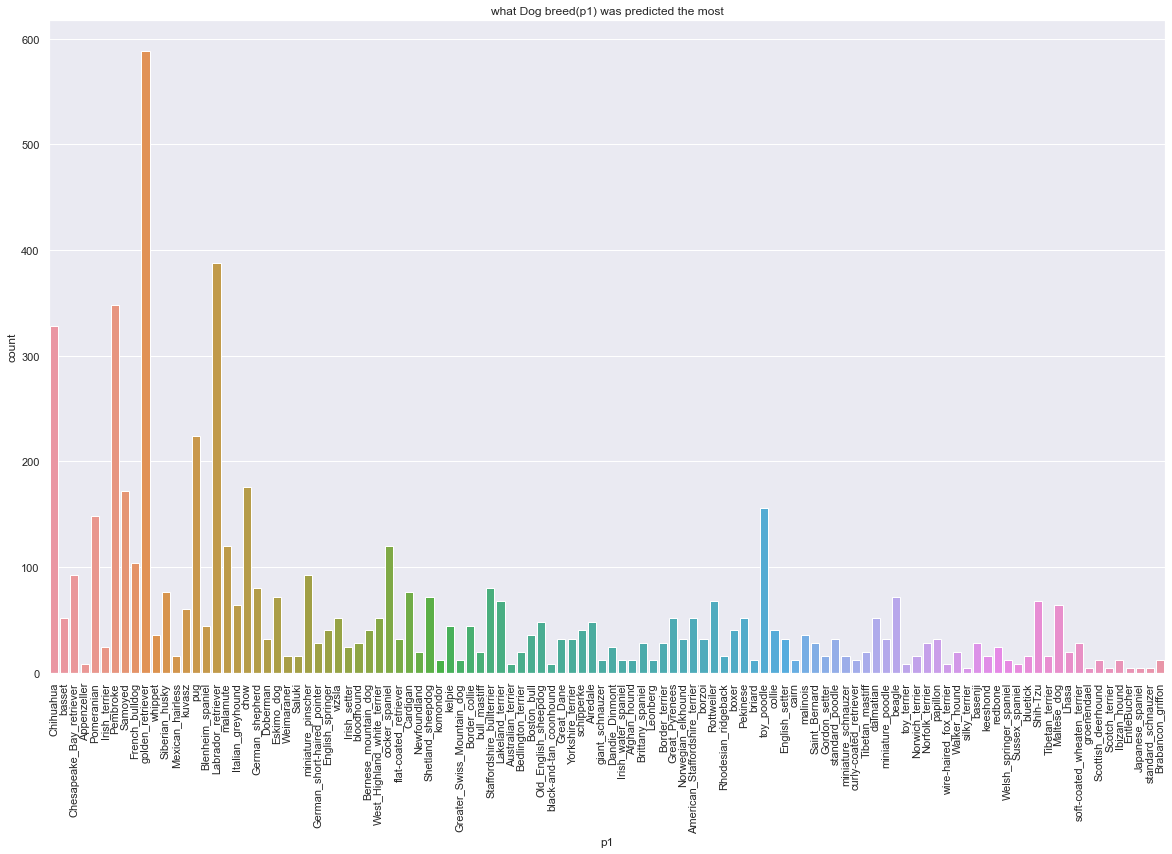

In [55]:
ax = sns.countplot(x='p1', data=twitter_archive_master)
ax.tick_params(axis='x', rotation=90)
sns.set(rc={'figure.figsize':(40,12)})
plt.title('what Dog breed(p1) was predicted the most');

Golden retriver is the most predicted dog. followed by Labrador retriver

## 2) what stage was the most popular apart from 'None'?

In [44]:
twitter_archive_master.value.value_counts()

None       5776
pupper      157
doggo        63
puppo        20
floofer       8
Name: value, dtype: int64

## 3) what source did people use to upload the most?

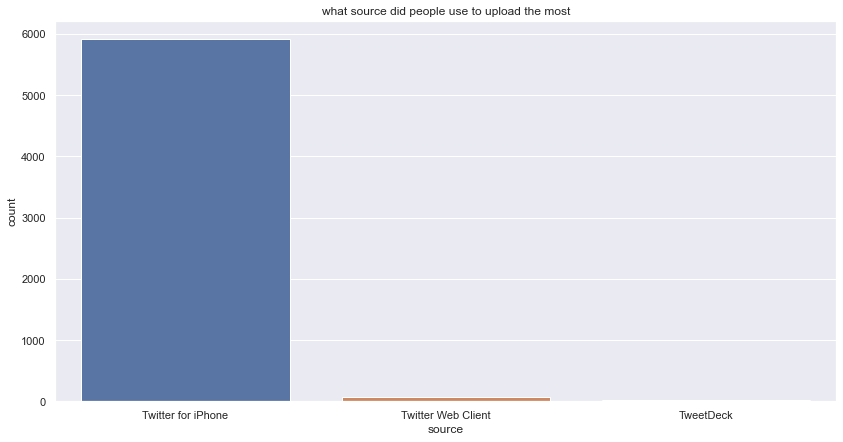

In [53]:
sns.countplot(x='source',data=twitter_archive_master).set_title('what source did people use to upload the most')
sns.set(rc={'figure.figsize':(10,7)});